<a href="https://colab.research.google.com/github/Git-Codder/Life-Expectacncy-/blob/main/LifeExpectencyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Moderate'> Life Expectancy Prediction Machine Learning Project

# <font color='Red'> Data Preprocessing (Data Science Part)

---



### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Datasets

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

### To visualise and read the dataset 

To know more -> [Click Here](https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/index.html)


In [ ]:
#Function to Print the value together
def countUniqType(dataset) :
  dataList = []
  colName = list(dataset.columns.values)
  for i in colName : 
    temp = []
    temp = [i,dataset[i].nunique(),dataset[i].isnull().sum(),dataset[i].dtypes]
    dataList.append(temp)

  #changing 2-d list to dataframe
  df_data = pd.DataFrame(dataList)
  # df_data = df_data.transpose()
  df_data.columns = ["Column Name", "Unique Value ", "Missing Value", "Data Type"]
  print(df_data)

  return 

#function for read and analysis the dataset
def read_and_analysis(data) :
  print(" Data : ")
  print(data.head())
  print()
  print(40 * '*')
  print("Data Shape : ",data.shape)
  print()
  print(40 * '*')
  print()
  print(40 * '*')
  
  return 

In [ ]:
read_and_analysis(df)
countUniqType(df)
# print(df.values)

 Data : 
       Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

****************************************
Data Shape :  (2938, 22)

****************************************

****************************************
                        Column Name  Unique Value   Missing Value Data Type
0                           Country            193              0    object
1                              Year             16              0     int64
2                            Status              2              0    object
3                  Life expectancy             362             10   float64
4                   Adu

### droping coulumns (Using unique value strategy) (May be a Bad Stratgey)

In [ ]:
# Function to drop the column which has unique value less than 1% of the datset row
def dropByuniqu(dataset) : 
  colName = list(dataset.columns.values)
  onepercent = (dataset.shape[0])//100;
  for i in colName : 
    if(dataset[i].nunique() < onepercent) : 
      dataset.drop(i,axis=1,inplace=True)

  return 

# Function to drop the columns which has missing value greter than 99% of the dataset row_count
def dropBymissing(dataset) : 
  colName = list(dataset.columns.values)
  ninetyninepercent = (dataset.shape[0]*99)//100;
  for i in colName : 
    if(dataset[i].isnull().sum() > ninetyninepercent) : 
      dataset.drop(i,axis=1,inplace=True)

  return 


In [ ]:
dropBymissing(df)

#drop country column (It does not have any impact on Life Expectancy)
df.drop('Country',axis=1,inplace=True)

print(df.shape)
print(df.dtypes)

(2938, 21)
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


### Encoding DataFrame 

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
  dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
  original_dataframe.drop(feature_to_encode,axis=1,inplace=True)
  res = pd.concat([original_dataframe, dummies], axis=1)
  return(res)
  
df = encode_and_bind(df,'Status')

In [ ]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


### Handling missing values in Dataset 

To know more about missing values handling -> [Click Here](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b) 


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developed                   0
Status_Developing                  0
dtype: int64

### spliting data in dependent variable and independent variable

In [ ]:
x = df.iloc[:,df.columns != 'Life expectancy '].values
y = df.iloc[:,df.columns == 'Life expectancy '].values


In [ ]:
print(x)

[[2.02e+03 2.63e+02 6.20e+01 ... 1.01e+01 0.00e+00 1.00e+00]
 [2.01e+03 2.71e+02 6.40e+01 ... 1.00e+01 0.00e+00 1.00e+00]
 [2.01e+03 2.68e+02 6.60e+01 ... 9.90e+00 0.00e+00 1.00e+00]
 ...
 [2.00e+03 7.30e+01 2.50e+01 ... 1.00e+01 0.00e+00 1.00e+00]
 [2.00e+03 6.86e+02 2.50e+01 ... 9.80e+00 0.00e+00 1.00e+00]
 [2.00e+03 6.65e+02 2.40e+01 ... 9.80e+00 0.00e+00 1.00e+00]]


In [ ]:
print(y)

[[65. ]
 [59.9]
 [59.9]
 ...
 [44.8]
 [45.3]
 [46. ]]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [ ]:
df.max()

Year                               2.015000e+03
Life expectancy                    8.900000e+01
Adult Mortality                    7.230000e+02
infant deaths                      1.800000e+03
Alcohol                            1.787000e+01
percentage expenditure             1.947991e+04
Hepatitis B                        9.900000e+01
Measles                            2.121830e+05
 BMI                               8.730000e+01
under-five deaths                  2.500000e+03
Polio                              9.900000e+01
Total expenditure                  1.760000e+01
Diphtheria                         9.900000e+01
 HIV/AIDS                          5.060000e+01
GDP                                1.191727e+05
Population                         1.293859e+09
 thinness  1-19 years              2.770000e+01
 thinness 5-9 years                2.860000e+01
Income composition of resources    9.480000e-01
Schooling                          2.070000e+01
Status_Developed                   1.000

In [ ]:
df.min()

Year                               2000.00000
Life expectancy                      36.30000
Adult Mortality                       1.00000
infant deaths                         0.00000
Alcohol                               0.01000
percentage expenditure                0.00000
Hepatitis B                           1.00000
Measles                               0.00000
 BMI                                  1.00000
under-five deaths                     0.00000
Polio                                 3.00000
Total expenditure                     0.37000
Diphtheria                            2.00000
 HIV/AIDS                             0.10000
GDP                                   1.68135
Population                           34.00000
 thinness  1-19 years                 0.10000
 thinness 5-9 years                   0.10000
Income composition of resources       0.00000
Schooling                             0.00000
Status_Developed                      0.00000
Status_Developing                 

***Note*** : here feature scaling does not require cause it has diverse range all of the column not impact of a single feature(Column)

# <font color='Blue'> Regression Model Processing


---



In [ ]:
# List to Store all Model r_square value

modelPerformance = [] 

## <font color='violate'> ***Multilple Linear Regression***


### Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test set results

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[79.85 82.1 ]
 [57.23 58.4 ]
 [64.31 63.3 ]
 ...
 [67.69 73.1 ]
 [54.63 51.3 ]
 [62.62 58.6 ]]


### Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
modelPerformance.append(r2_score(y_test, y_pred))

## <font color='Orange'> ***Polynomial Linear Regression***

### Training the Polynomial Regression model on the Training set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test set results

In [ ]:
y_pred = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[82.49 82.1 ]
 [53.85 58.4 ]
 [66.44 63.3 ]
 ...
 [68.65 73.1 ]
 [47.56 51.3 ]
 [60.15 58.6 ]]


### Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
modelPerformance.append(r2_score(y_test, y_pred))

## <font color='Green'> ***Support Vector Regression*** 

### Feature Scaling for Support Vector Regression 

***Note*** : Support Vector Regression has an inbuilt function to compute the dataset so we have to provide data in specific range to keep same effect of all column thatswhy we have to scale dataset 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_sk = sc_x.fit_transform(x_train)
y_train_sk = sc_y.fit_transform(y_train)

### Training the SVR model on the Training set

In [ ]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(x_train_sk, y_train_sk)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting the Test set results

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(x_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[82.66 82.1 ]
 [59.03 58.4 ]
 [67.02 63.3 ]
 ...
 [73.24 73.1 ]
 [49.83 51.3 ]
 [56.87 58.6 ]]


### Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
modelPerformance.append(r2_score(y_test, y_pred))

## <font color='Purple'> ***Decision Tree Regression***

### Training the Decision Tree Regression model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

### Predicting the Test set results

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[81.8 82.1]
 [55.6 58.4]
 [65.9 63.3]
 ...
 [72.6 73.1]
 [54.  51.3]
 [56.3 58.6]]


### Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
modelPerformance.append(r2_score(y_test, y_pred))

## <font color='Blue Flower'> ***Random Forest Regression***

### Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Predicting the Test set results

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[82.62 82.1 ]
 [53.83 58.4 ]
 [64.97 63.3 ]
 ...
 [72.63 73.1 ]
 [50.49 51.3 ]
 [58.46 58.6 ]]


### Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
modelPerformance.append(r2_score(y_test, y_pred))

# <font color='Magenta'> Analysing Model Performances 

---



### Preparing Data Of Model Performances 

In [ ]:
xLables = ['Linear (Multiple)','Polynomial','Support Vector','Decision Tree','Random Forest']

xCord = np.arange(0,1,0.2)
yCord = np.array(modelPerformance)

print(yCord)


[0.81 0.83 0.92 0.93 0.95]


## Ploting Graph Of All Model Performances 

### Ploting Simple Trade Line Graph

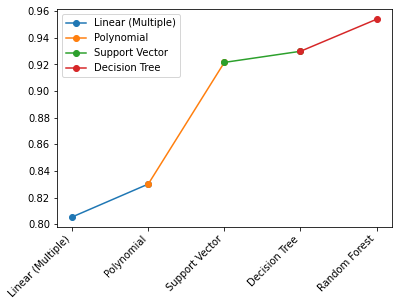

In [ ]:
# Ploting a trade simple line graph which shows the change from one model to another model
for i in range(1,5) :
  xPoint = [xCord[i-1],xCord[i]]
  yPoint = [yCord[i-1],yCord[i]]
  plt.plot(xPoint,yPoint,marker='o') 
plt.legend([xLables[0],xLables[1],xLables[2],xLables[3],xLables[4]])

plt.xticks(xCord,xLables)
plt.xticks(rotation=45, ha="right")

plt.show()



### Ploting Simple Bar Chard 

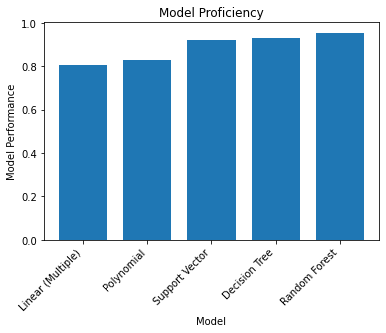

In [ ]:
width = 0.15
plt.xticks(xCord,xLables)
plt.xticks(rotation=45, ha="right")

plt.bar(xCord,yCord, width)
plt.title('Model Proficiency')
plt.xlabel('Model')
plt.ylabel('Model Performance')

plt.show()